## Analysis of Internal flight data for US carriers

* Muireadach Mac Mahon, 15559007

### This Python 3 notebook uses a Bureau of Transportation Statistics data set of Internal US Flights Data of 2017. In this notebook we will analyse:

* Most popular routes and most popular airlines
* Most active airports/states/
* Busiest time of year/busiest month/trends of destinations throughout the year 

#### Importing the required libraries

In [50]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

## Task 1: Data Identification and Manipulation

I chose the Internal flight data for US carriers link from the list of options and downloaded the file from this link: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=292
I selected 15 of the following variables to be included in my data set: "PASSENGERS","DISTANCE","UNIQUE_CARRIER","AIRLINE_ID","UNIQUE_CARRIER_NAME","ORIGIN_AIRPORT_ID",
"ORIGIN","ORIGIN_CITY_NAME","ORIGIN_COUNTRY","DEST_AIRPORT_ID","DEST","DEST_CITY_NAME","DEST_COUNTRY",
"YEAR","MONTH"

This data set contains 214,544 rows of data and each row has an integer or a string value relating to that variable.

This data was downloaded as a single file and is in the .CSV file format. I downloaded several other .CSV files that were there to explain the meanings of the attributes of the main file.

I want to read the .CSV file and show the data. In order to do this I can use the read_csv() function

In [51]:
df_airline = pd.read_csv( "/Users/Murray/stage3/pythonassignment1/internal_US_flight_data.csv" )
df_airline

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,YEAR,MONTH,Unnamed: 15
0,0.0,2608.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,12986,LIM,"Lima, Peru",PE,2017,5,NaN
1,0.0,675.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,13495,MSY,"New Orleans, LA",US,2017,5,NaN
2,0.0,848.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,14739,SDQ,"Santo Domingo, Dominican Republic",DO,2017,5,NaN
3,0.0,1045.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,14843,SJU,"San Juan, PR",US,2017,5,NaN
4,0.0,1224.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,15084,SXM,"Philipsburg, Sint Maarten",SX,2017,5,NaN
5,0.0,404.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13341,MKC,"Kansas City, MO",US,13487,MSP,"Minneapolis, MN",US,2017,5,NaN
6,0.0,74.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13342,MKE,"Milwaukee, WI",US,13485,MSN,"Madison, WI",US,2017,5,NaN
7,0.0,362.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13485,MSN,"Madison, WI",US,15048,SUX,"Sioux City, IA",US,2017,5,NaN
8,0.0,695.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13487,MSP,"Minneapolis, MN",US,10693,BNA,"Nashville, TN",US,2017,5,NaN
9,0.0,22.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",14107,PHX,"Phoenix, AZ",US,10466,AZA,"Phoenix, AZ",US,2017,5,NaN


* The above is a basic overview of the data and highlights some areas that I want to change. In my submission, I will include the original .CSV file that I downloaded in order to see what I had at the beginning.

In [52]:
# Ensure the file exists
# Use the "internal_US_flight_data.csv" file in the folder that I have submitted to view the original data set
if not os.path.exists( "/Users/Murray/stage3/pythonassignment1/internal_US_flight_data.csv" ):
    print("File not found")

## Task 2: Data Preparation


* I have already loaded and represented the data as a Pandas DataFrame and called that DataFrame *df_airline*.

* When I first inspected the data, I noticed a few changes that I needed to make. These include:
    * Changing the type of "PASSENGERS" and "DISTANCES"
    * Remove the "YEARS" column since every row is for the year 2017 so it makes that column redundant
    * Remove the Unnamed:15 column
    * Remove rows of less than 1 passenger total
    * Edit the DISTANCE column to indicate metric
    * Map the numbers from the MONTHS column to the appropriate string


In [55]:
df_airline.head(35950)

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,YEAR,MONTH
0,0.0,2608.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,12986,LIM,"Lima, Peru",PE,2017,5
1,0.0,675.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,13495,MSY,"New Orleans, LA",US,2017,5
2,0.0,848.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,14739,SDQ,"Santo Domingo, Dominican Republic",DO,2017,5
3,0.0,1045.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,14843,SJU,"San Juan, PR",US,2017,5
4,0.0,1224.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,15084,SXM,"Philipsburg, Sint Maarten",SX,2017,5
5,0.0,404.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13341,MKC,"Kansas City, MO",US,13487,MSP,"Minneapolis, MN",US,2017,5
6,0.0,74.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13342,MKE,"Milwaukee, WI",US,13485,MSN,"Madison, WI",US,2017,5
7,0.0,362.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13485,MSN,"Madison, WI",US,15048,SUX,"Sioux City, IA",US,2017,5
8,0.0,695.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13487,MSP,"Minneapolis, MN",US,10693,BNA,"Nashville, TN",US,2017,5
9,0.0,22.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",14107,PHX,"Phoenix, AZ",US,10466,AZA,"Phoenix, AZ",US,2017,5


* Remove the Unnamed:15 column


In [54]:
df_airline = df_airline.dropna(axis=1, how='all')
df_airline

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,YEAR,MONTH
0,0.0,2608.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,12986,LIM,"Lima, Peru",PE,2017,5
1,0.0,675.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,13495,MSY,"New Orleans, LA",US,2017,5
2,0.0,848.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,14739,SDQ,"Santo Domingo, Dominican Republic",DO,2017,5
3,0.0,1045.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,14843,SJU,"San Juan, PR",US,2017,5
4,0.0,1224.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,MIA,"Miami, FL",US,15084,SXM,"Philipsburg, Sint Maarten",SX,2017,5
5,0.0,404.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13341,MKC,"Kansas City, MO",US,13487,MSP,"Minneapolis, MN",US,2017,5
6,0.0,74.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13342,MKE,"Milwaukee, WI",US,13485,MSN,"Madison, WI",US,2017,5
7,0.0,362.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13485,MSN,"Madison, WI",US,15048,SUX,"Sioux City, IA",US,2017,5
8,0.0,695.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13487,MSP,"Minneapolis, MN",US,10693,BNA,"Nashville, TN",US,2017,5
9,0.0,22.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",14107,PHX,"Phoenix, AZ",US,10466,AZA,"Phoenix, AZ",US,2017,5


* Using: df_airline = df_airline.drop("YEAR", 1), remove the "YEARS" column since every row is for the year 2017 so it makes that column redundant.


In [67]:
df_airline

,PASSENGERS,DISTANCE (miles),UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,MONTH
35928,1,4007,0Q,21147,Flying Service N.V.,10292,AMS,"Amsterdam, Netherlands",NL,10778,BTL,"Battle Creek, MI",US,Jan
35929,1,4006,0Q,21147,Flying Service N.V.,10778,BTL,"Battle Creek, MI",US,14639,RTM,"Rotterdam, Netherlands",NL,Jan
35930,1,5455,0QQ,21308,TAG Aviation (UK) Ltd.,12892,LAX,"Los Angeles, CA",US,11628,FAB,"Farnborough, United Kingdom",GB,Jan
35931,1,3574,0RQ,21309,TAG Aviation Espana S.L.,12197,HPN,"White Plains, NY",US,13156,MAD,"Madrid, Spain",ES,Jan
35932,1,430,13Q,21437,Chartright Air Inc.,10540,BED,"Bedford, MA",US,16271,YYZ,"Toronto, Canada",CA,Jan
35933,1,968,13Q,21437,Chartright Air Inc.,12448,JAN,"Jackson/Vicksburg, MS",US,16271,YYZ,"Toronto, Canada",CA,Jan
35934,1,357,13Q,21437,Chartright Air Inc.,12953,LGA,"New York, NY",US,16271,YYZ,"Toronto, Canada",CA,Jan
35935,1,204,13Q,21437,Chartright Air Inc.,14275,PTK,"Pontiac, MI",US,16271,YYZ,"Toronto, Canada",CA,Jan
35936,1,1213,13Q,21437,Chartright Air Inc.,14712,SCF,"Phoenix, AZ",US,16257,YYC,"Calgary, Canada",CA,Jan
35937,1,324,13Q,21437,Chartright Air Inc.,16217,YUL,"Montreal, Canada",CA,12953,LGA,"New York, NY",US,Jan


* Remove rows of less than 1 passenger total


In [61]:
df_airline = df_airline[df_airline.PASSENGERS != 0]
df_airline

,PASSENGERS,DISTANCE (miles),UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,MONTH
35928,1,4007,0Q,21147,Flying Service N.V.,10292,AMS,"Amsterdam, Netherlands",NL,10778,BTL,"Battle Creek, MI",US,Jan
35929,1,4006,0Q,21147,Flying Service N.V.,10778,BTL,"Battle Creek, MI",US,14639,RTM,"Rotterdam, Netherlands",NL,Jan
35930,1,5455,0QQ,21308,TAG Aviation (UK) Ltd.,12892,LAX,"Los Angeles, CA",US,11628,FAB,"Farnborough, United Kingdom",GB,Jan
35931,1,3574,0RQ,21309,TAG Aviation Espana S.L.,12197,HPN,"White Plains, NY",US,13156,MAD,"Madrid, Spain",ES,Jan
35932,1,430,13Q,21437,Chartright Air Inc.,10540,BED,"Bedford, MA",US,16271,YYZ,"Toronto, Canada",CA,Jan
35933,1,968,13Q,21437,Chartright Air Inc.,12448,JAN,"Jackson/Vicksburg, MS",US,16271,YYZ,"Toronto, Canada",CA,Jan
35934,1,357,13Q,21437,Chartright Air Inc.,12953,LGA,"New York, NY",US,16271,YYZ,"Toronto, Canada",CA,Jan
35935,1,204,13Q,21437,Chartright Air Inc.,14275,PTK,"Pontiac, MI",US,16271,YYZ,"Toronto, Canada",CA,Jan
35936,1,1213,13Q,21437,Chartright Air Inc.,14712,SCF,"Phoenix, AZ",US,16257,YYC,"Calgary, Canada",CA,Jan
35937,1,324,13Q,21437,Chartright Air Inc.,16217,YUL,"Montreal, Canada",CA,12953,LGA,"New York, NY",US,Jan


* Changing the type of "PASSENGERS" and "DISTANCES"

df_airline["PASSENGERS"] = df_airline.PASSENGERS.astype(np.int64)
df_airline["DISTANCE"] = df_airline.DISTANCE.astype(np.int64)

df_airline

* Edit the DISTANCE column to indicate metric
* I know that the DISTANCE column is in miles because I took a random sample of flights and used the Google Maps feature - Measure Distance - to show the distance between the 2 airports. The default distance is in KM but this was easily converted to miles using an online calculator.


In [58]:
df_airline=df_airline.rename(columns = {"DISTANCE":"DISTANCE (miles)"})
df_airline

,PASSENGERS,DISTANCE (miles),UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,YEAR,MONTH
35928,1,4007,0Q,21147,Flying Service N.V.,10292,AMS,"Amsterdam, Netherlands",NL,10778,BTL,"Battle Creek, MI",US,2017,1
35929,1,4006,0Q,21147,Flying Service N.V.,10778,BTL,"Battle Creek, MI",US,14639,RTM,"Rotterdam, Netherlands",NL,2017,1
35930,1,5455,0QQ,21308,TAG Aviation (UK) Ltd.,12892,LAX,"Los Angeles, CA",US,11628,FAB,"Farnborough, United Kingdom",GB,2017,1
35931,1,3574,0RQ,21309,TAG Aviation Espana S.L.,12197,HPN,"White Plains, NY",US,13156,MAD,"Madrid, Spain",ES,2017,1
35932,1,430,13Q,21437,Chartright Air Inc.,10540,BED,"Bedford, MA",US,16271,YYZ,"Toronto, Canada",CA,2017,1
35933,1,968,13Q,21437,Chartright Air Inc.,12448,JAN,"Jackson/Vicksburg, MS",US,16271,YYZ,"Toronto, Canada",CA,2017,1
35934,1,357,13Q,21437,Chartright Air Inc.,12953,LGA,"New York, NY",US,16271,YYZ,"Toronto, Canada",CA,2017,1
35935,1,204,13Q,21437,Chartright Air Inc.,14275,PTK,"Pontiac, MI",US,16271,YYZ,"Toronto, Canada",CA,2017,1
35936,1,1213,13Q,21437,Chartright Air Inc.,14712,SCF,"Phoenix, AZ",US,16257,YYC,"Calgary, Canada",CA,2017,1
35937,1,324,13Q,21437,Chartright Air Inc.,16217,YUL,"Montreal, Canada",CA,12953,LGA,"New York, NY",US,2017,1


* Map the numbers from the MONTHS column to the appropriate string


* This can be done easily by importing the calendar library and the calendar.month_abbr feature.

In [59]:
import calendar
df_airline["MONTH"] = df_airline["MONTH"].apply(lambda x: calendar.month_abbr[x])
df_airline


,PASSENGERS,DISTANCE (miles),UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,YEAR,MONTH
35928,1,4007,0Q,21147,Flying Service N.V.,10292,AMS,"Amsterdam, Netherlands",NL,10778,BTL,"Battle Creek, MI",US,2017,Jan
35929,1,4006,0Q,21147,Flying Service N.V.,10778,BTL,"Battle Creek, MI",US,14639,RTM,"Rotterdam, Netherlands",NL,2017,Jan
35930,1,5455,0QQ,21308,TAG Aviation (UK) Ltd.,12892,LAX,"Los Angeles, CA",US,11628,FAB,"Farnborough, United Kingdom",GB,2017,Jan
35931,1,3574,0RQ,21309,TAG Aviation Espana S.L.,12197,HPN,"White Plains, NY",US,13156,MAD,"Madrid, Spain",ES,2017,Jan
35932,1,430,13Q,21437,Chartright Air Inc.,10540,BED,"Bedford, MA",US,16271,YYZ,"Toronto, Canada",CA,2017,Jan
35933,1,968,13Q,21437,Chartright Air Inc.,12448,JAN,"Jackson/Vicksburg, MS",US,16271,YYZ,"Toronto, Canada",CA,2017,Jan
35934,1,357,13Q,21437,Chartright Air Inc.,12953,LGA,"New York, NY",US,16271,YYZ,"Toronto, Canada",CA,2017,Jan
35935,1,204,13Q,21437,Chartright Air Inc.,14275,PTK,"Pontiac, MI",US,16271,YYZ,"Toronto, Canada",CA,2017,Jan
35936,1,1213,13Q,21437,Chartright Air Inc.,14712,SCF,"Phoenix, AZ",US,16257,YYC,"Calgary, Canada",CA,2017,Jan
35937,1,324,13Q,21437,Chartright Air Inc.,16217,YUL,"Montreal, Canada",CA,12953,LGA,"New York, NY",US,2017,Jan


* This data is now cleaned and ready to be saved and analysed. For the purpose of this assignment I will include in my submission the original .CSV file as well as the .CSV file that has been cleaned up to and including the last edit (Map the numbers from the MONTHS column to the appropriate string). This file will be called cleaned_data.csv.

In [91]:
df_airline.to_csv("/Users/Murray/stage3/pythonassignment1/cleaned_data.csv", encoding='utf-8')

## Task 3: Data Analysis and Interpretation


* For this part of the assignment I want to do 2 things. Firstly, I want to explore the basic numbers of the data i.e. the average distance travelled, the total number of airports, flights, total number of passengers and total distance travelled by passengers. The best way to visualise this is with simple figures and tables.

* From there, I want to explore where this chaos is i.e. the busiest airport, busiest US State and busiest month. In this part, charts would be the best option since I am only looking at a small slice of the data and the comparisons can be easily identified.

## Part 1

* First check the overall data to make sure the columns are correct.

In [69]:
df_airline

,PASSENGERS,DISTANCE (miles),UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,MONTH
35928,1,4007,0Q,21147,Flying Service N.V.,10292,AMS,"Amsterdam, Netherlands",NL,10778,BTL,"Battle Creek, MI",US,Jan
35929,1,4006,0Q,21147,Flying Service N.V.,10778,BTL,"Battle Creek, MI",US,14639,RTM,"Rotterdam, Netherlands",NL,Jan
35930,1,5455,0QQ,21308,TAG Aviation (UK) Ltd.,12892,LAX,"Los Angeles, CA",US,11628,FAB,"Farnborough, United Kingdom",GB,Jan
35931,1,3574,0RQ,21309,TAG Aviation Espana S.L.,12197,HPN,"White Plains, NY",US,13156,MAD,"Madrid, Spain",ES,Jan
35932,1,430,13Q,21437,Chartright Air Inc.,10540,BED,"Bedford, MA",US,16271,YYZ,"Toronto, Canada",CA,Jan
35933,1,968,13Q,21437,Chartright Air Inc.,12448,JAN,"Jackson/Vicksburg, MS",US,16271,YYZ,"Toronto, Canada",CA,Jan
35934,1,357,13Q,21437,Chartright Air Inc.,12953,LGA,"New York, NY",US,16271,YYZ,"Toronto, Canada",CA,Jan
35935,1,204,13Q,21437,Chartright Air Inc.,14275,PTK,"Pontiac, MI",US,16271,YYZ,"Toronto, Canada",CA,Jan
35936,1,1213,13Q,21437,Chartright Air Inc.,14712,SCF,"Phoenix, AZ",US,16257,YYC,"Calgary, Canada",CA,Jan
35937,1,324,13Q,21437,Chartright Air Inc.,16217,YUL,"Montreal, Canada",CA,12953,LGA,"New York, NY",US,Jan


* The YEAR column has been removed, the MONTH integer have been replaced, the DISTANCE column has been edited and the PASSENGERS and DISTANCE coulmns have changed their types.

In [114]:
# This calculates the average distance travelled in 2017 for every flight
avg_dist = df_airline["DISTANCE (miles)"].mean()
print(round(avg_dist))

1241


* Total distance travelled, total passengers, total flights

In [119]:
total_dist = df_airline["DISTANCE (miles)"].sum()
total_passengers = df_airline["PASSENGERS"].sum()
total_flights = len(df_airline)

print("The total distance travelled by all passengers in miles in 2017 is", total_dist, ", the total number of people who travelled in 2017 is", total_passengers, "and the total number of flights in 2017 is", total_flights)

max_dist = df_airline["DISTANCE (miles)"].max()
print("The maximum distance flown in 2017 is", max_dist)

The total distance travelled by all passengers in miles in 2017 is 221745238 , the total number of people who travelled in 2017 is 651920386 and the total number of flights in 2017 is 178615
The maximum distance flown in 2017 is 10201


## Part 2

* These values give me an overall view of the scale of the data that I am dealing with. From this, I want to identify where exactly the majority of this data lies by identifying the busiest airports, US State and month of the year.

* Busiest State. This can be found by calculating the most occurrences of a city and State name in the ORIGIN_CITY_NAME column. Many States would have multiple airports located in that State so once the busiest State has been found, more anaysis can be completed.

In [72]:
df_airline["ORIGIN_CITY_NAME"].value_counts()

Chicago, IL                  6254
New York, NY                 5073
Washington, DC               4336
Atlanta, GA                  4149
Houston, TX                  4121
Los Angeles, CA              3905
Denver, CO                   3880
Minneapolis, MN              3505
Detroit, MI                  3473
Dallas/Fort Worth, TX        3075
Newark, NJ                   3022
Phoenix, AZ                  2515
Charlotte, NC                2501
Miami, FL                    2499
Seattle, WA                  2474
Boston, MA                   2460
Philadelphia, PA             2447
Las Vegas, NV                2372
San Francisco, CA            2358
Orlando, FL                  2343
Fort Lauderdale, FL          2336
Salt Lake City, UT           1849
Baltimore, MD                1526
Raleigh/Durham, NC           1446
Portland, OR                 1432
Tampa, FL                    1413
St. Louis, MO                1410
Pittsburgh, PA               1406
New Orleans, LA              1399
San Diego, CA 

* From the above table, we can see that Chicago has the highest number of occurrences in the dataset of planes leaving a certain origin. In the next cell, I compare this with the destination city and it should be almost identical. 

In [78]:
df_airline["DEST_CITY_NAME"].value_counts()

Chicago, IL                    6230
New York, NY                   5213
Washington, DC                 4276
Atlanta, GA                    4102
Houston, TX                    4083
Los Angeles, CA                3914
Denver, CO                     3863
Minneapolis, MN                3452
Detroit, MI                    3449
Dallas/Fort Worth, TX          3067
Newark, NJ                     3040
Seattle, WA                    2500
Miami, FL                      2499
Philadelphia, PA               2457
Charlotte, NC                  2448
Phoenix, AZ                    2447
Boston, MA                     2444
Las Vegas, NV                  2381
San Francisco, CA              2334
Orlando, FL                    2291
Fort Lauderdale, FL            2256
Salt Lake City, UT             1856
Baltimore, MD                  1474
Raleigh/Durham, NC             1464
Portland, OR                   1449
Tampa, FL                      1418
St. Louis, MO                  1396
Nashville, TN               

* Interestingly, the order is the same but the numbers differ slightly. Some airports clearly have more planes leaving than they do arriving.

* I want to further explore the busiest airports based on the number of ORIGIN_CITY_NAME and DEST_CITY_NAME occurrences in the data set. The next two cells compare this data and there are small differences. For example, Phoenix AZ does not make the top 20 of highest occurrences of DEST_CITY_NAME even though it makes the ORIGIN_CITY_NAME top 20.

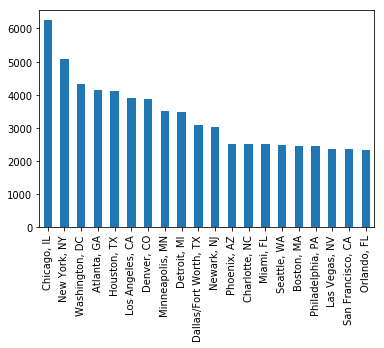

In [83]:
counts = df_airline["ORIGIN_CITY_NAME"].value_counts().sort_values(ascending=False)
p = counts[:20].plot(kind="bar")



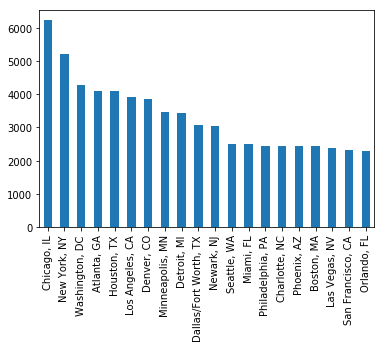

In [82]:
counts = df_airline["DEST_CITY_NAME"].value_counts().sort_values(ascending=False)
p = counts[:20].plot(kind="bar")


* There are many airports located in each city. I want to count the number of occurrences of the top 3 international airports in the ORIGIN_CITY_NAME table above.
* From consulting the lookup CSV files that I used (L_AIRPORT_ID.csv), the unique code for Chicago O'Hare International is 13930, New York, NY: John F. Kennedy International is 12478 and Washington, DC: Washington Dulles International is 12264.

In [107]:
# Chicago
len(df_airline[df_airline["ORIGIN_AIRPORT_ID"] == 13930])

5237

In [108]:
# JFK
len(df_airline[df_airline["ORIGIN_AIRPORT_ID"] == 12478])

2982

In [109]:
# Dulles
len(df_airline[df_airline["ORIGIN_AIRPORT_ID"] == 12264])

2150

* This is an interesting insight. Chicago O'Hare International has almost double the occurrences of ORIGIN_AIRPORT_ID than the next 2 airports. According to a Google search, Chicago International is both bigger in size and has larger amounts of traffic than JFK airport and Dulles.

Text(0.5,1,'3 largest airports in US (Based on Origin City)')

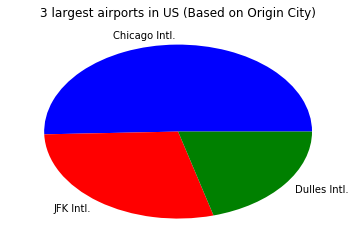

In [112]:
# To represent this information in a pie chart
airport_data = [5237, 2982, 2150]
cities = ["Chicago Intl.","JFK Intl.","Dulles Intl."]

plt.figure()

mycolors=["blue","red","green"]
p = plt.pie(airport_data, labels=cities,
colors=mycolors)

# Add title
plt.title("3 largest airports in US (Based on Origin City)")

* Having covered the busiest airports and where they are located, I now want to identify the busiest months of the year.

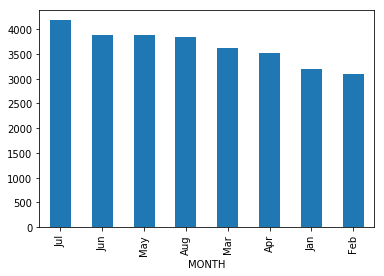

In [92]:
busy_month = df_airline.groupby(['MONTH']).PASSENGERS.mean().sort_values(ascending=False)
busy_month[:8].plot(kind="bar")

* I stored the values of the *average* passengers per month and plotted a bar chart of the data. I expected that the summer would have the busy months and I was right. There is a huge amount of air travel in the summer months versus the winter months.
* I limited the chart to only showing the first 8 months and and sorted the data in descending order to make it easier to read.

## Analysis Review

* In my analysis, I set out to identify the busiest parts of America, the time of year that people tend to fly more often and the busiest airports based on the location. This analysis was carried out based on the initial investigation on the data that I carried out. When I identified the basic layout of the data such as averages, totals and maximums I had a much better understanding of the data and that is why I proceeded in the direction in part 2 of my analysis.

* My summary of the data is that the summer months are certainly more busy than the winter months. This is due to people preferring to go on "sun-holidays" rather than "winter-holidays", people generally have more time off at this time of year (school children are a prime example) and there could even be a preference for people to stay at home during the Christmas holidays.

* Air travel in the USA is enormous and I wanted to analyse just how big it is. First, I identified the busiest States in order to hone in on what airports to carry out more analysis on. These States have multiple airports which contributes to the high level of air traffic. I singled out the top 3 airports using their unique airport code and counted the occurrences again and Chicago still came out on top which was very interesting and insightful.

* Every year, Chicago has the busiest traffic numbers and 2017 was no different. This is because Chicago Intl. serves as a hub for two of America's largest airlines - United Airlines and American Airlines. 

* In preparing my data, I used the lookup tables that were provided on the website from where I got the data set. I will include these in my submission. I thought it was interesting that there were options to include Freight or Mail measurements but I excluded these as I was only focused on the passenger data. This is another reason why I excluded all flights with less than 1 passenger enplaned.

## Next Steps

* Include delay and cancellation columns in the data which would give great insights to which airlines have low delay and cancellation rates.

* Explore the safety of airlines based on reports of faults. this could be correlated with the age of the aircraft and even the manufacture type.

* Filter out all flights outside the USA and draw a map of flights across the country, highlighting the busiest routes and where exactly people fly on a daily basis.